Team Menber: Janki Patel

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer



# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory_path = '/content/drive/MyDrive/CS418_Project/data'
# Read CSV files into DataFrames
data_2020 = pd.DataFrame(pd.read_csv(directory_path + '/rank_name_symbol_2020.csv'))
data_2021 = pd.DataFrame(pd.read_csv(directory_path + '/rank_name_symbol_2021.csv'))
data_2022 = pd.DataFrame(pd.read_csv(directory_path + '/rank_name_symbol_2022.csv'))
data_2023 = pd.DataFrame(pd.read_csv(directory_path + '/rank_name_symbol_2023.csv'))


In [ ]:
# Cleaning the data for the missing value
# Drop rows where any of the specified columns have null values
data_2020_cleaned = data_2020.dropna()
data_2021_cleaned = data_2021.dropna()
data_2022_cleaned = data_2022.dropna()
data_2023_cleaned = data_2023.dropna()

In [ ]:
# Remove commas from the 'Profit' column
data_2020_cleaned['Profit'] = data_2020_cleaned['Profit'].str.replace(',', '')
data_2021_cleaned['Profit'] = data_2020_cleaned['Profit'].str.replace(',', '')
data_2022_cleaned['Profit'] = data_2020_cleaned['Profit'].str.replace(',', '')
data_2023_cleaned['Profit'] = data_2020_cleaned['Profit'].str.replace(',', '')

# Convert the 'Profit' column to float
data_2020_cleaned['Profit'] = data_2020_cleaned['Profit'].astype(float)
data_2021_cleaned['Profit'] = data_2020_cleaned['Profit'].astype(float)
data_2022_cleaned['Profit'] = data_2020_cleaned['Profit'].astype(float)
data_2023_cleaned['Profit'] = data_2020_cleaned['Profit'].astype(float)

# Remove commas from the 'Revenue' column
data_2020_cleaned['Revenue'] = data_2020_cleaned['Revenue'].str.replace(',', '')
data_2021_cleaned['Revenue'] = data_2020_cleaned['Revenue'].str.replace(',', '')
data_2022_cleaned['Revenue'] = data_2020_cleaned['Revenue'].str.replace(',', '')
data_2023_cleaned['Revenue'] = data_2020_cleaned['Revenue'].str.replace(',', '')

# Convert the 'Revenue' column to float
data_2020_cleaned['Revenue'] = data_2020_cleaned['Revenue'].astype(float)
data_2021_cleaned['Revenue'] = data_2020_cleaned['Revenue'].astype(float)
data_2022_cleaned['Revenue'] = data_2020_cleaned['Revenue'].astype(float)
data_2023_cleaned['Revenue'] = data_2020_cleaned['Revenue'].astype(float)


# Convert the Stocks columns to float
data_2020_cleaned.loc[:, 'm1-o':'m12-c'] = data_2020_cleaned.loc[:, 'm1-o':'m12-c'].astype(float)
data_2021_cleaned.loc[:, 'm1-o':'m12-c'] = data_2021_cleaned.loc[:, 'm1-o':'m12-c'].astype(float)
data_2022_cleaned.loc[:, 'm1-o':'m12-c'] = data_2022_cleaned.loc[:, 'm1-o':'m12-c'].astype(float)
data_2023_cleaned.loc[:, 'm1-o':'m12-c'] = data_2023_cleaned.loc[:, 'm1-o':'m12-c'].astype(float)


# Convert the columns of string type
data_2020_cleaned.loc[:, 'Name':'Industry'] = data_2020_cleaned.loc[:, 'Name':'Industry'].astype(str)
data_2021_cleaned.loc[:, 'Name':'Industry'] = data_2021_cleaned.loc[:, 'Name':'Industry'].astype(str)
data_2022_cleaned.loc[:, 'Name':'Industry'] = data_2022_cleaned.loc[:, 'Name':'Industry'].astype(str)
data_2023_cleaned.loc[:, 'Name':'Industry'] = data_2023_cleaned.loc[:, 'Name':'Industry'].astype(str)

<ipython-input-10-da5dffac14bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_cleaned['Profit'] = data_2020_cleaned['Profit'].str.replace(',', '')
<ipython-input-10-da5dffac14bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021_cleaned['Profit'] = data_2020_cleaned['Profit'].str.replace(',', '')
<ipython-input-10-da5dffac14bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 


**VISUALIZATION 1**



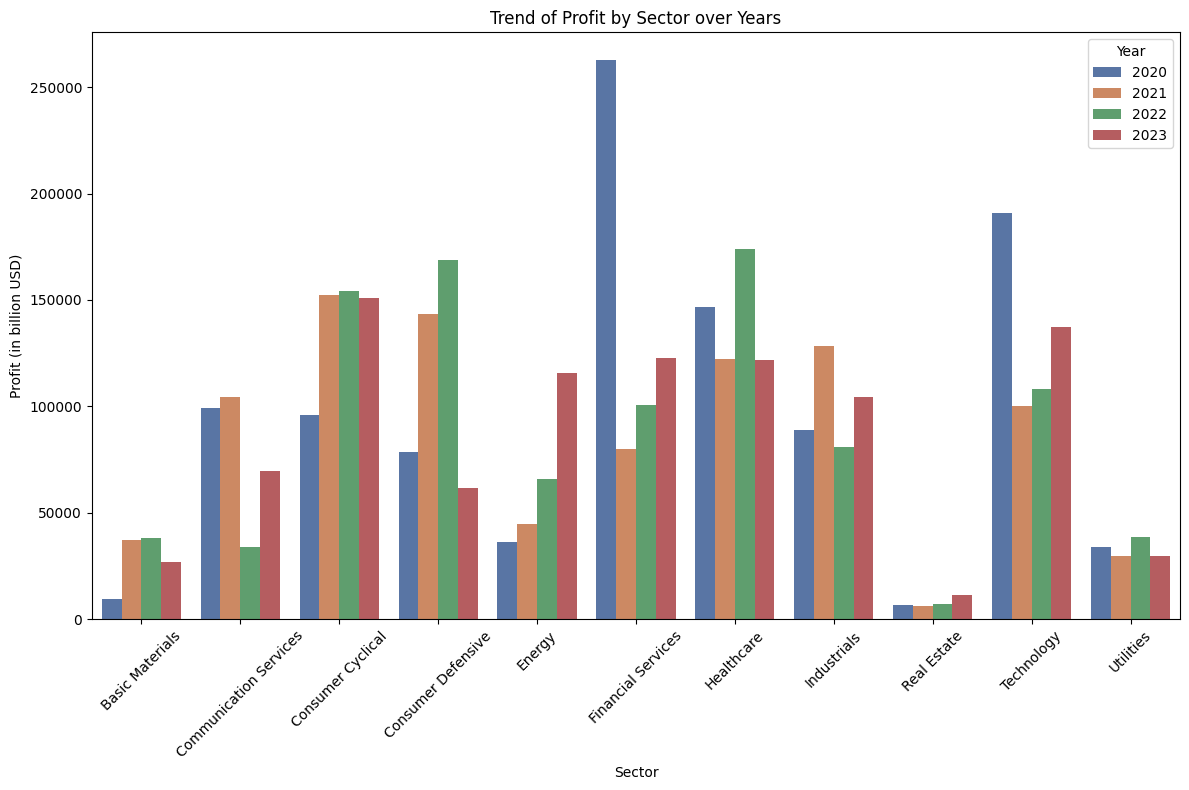

In [ ]:

sector_data_2020 = data_2020_cleaned.groupby('Sector').agg({'Profit': 'sum'}).reset_index()
sector_data_2021 = data_2021_cleaned.groupby('Sector').agg({'Profit': 'sum'}).reset_index()
sector_data_2022 = data_2022_cleaned.groupby('Sector').agg({'Profit': 'sum'}).reset_index()
sector_data_2023 = data_2023_cleaned.groupby('Sector').agg({'Profit': 'sum'}).reset_index()

def plot_combined_profit_by_sector_bar(sector_data_dict, palette):
    plt.figure(figsize=(12, 8))

    # Concatenate all years data for plotting
    all_data = pd.DataFrame()
    for year, sector_data in sector_data_dict.items():
        sector_data['Year'] = year  # Add a column for the year
        all_data = pd.concat([all_data, sector_data])

    # Plot the bar chart for revenue
    sns.barplot(x='Sector', y='Profit', hue='Year', data=all_data, errorbar=None, palette=palette)

    plt.xticks(rotation=45)
    plt.title('Trend of Profit by Sector over Years')
    plt.ylabel('Profit (in billion USD)')
    plt.xlabel('Sector')
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()

# Assuming sector_data_2020, sector_data_2021, sector_data_2022, sector_data_2023 are already defined
sector_data_dict = {
    2020: sector_data_2020,
    2021: sector_data_2021,
    2022: sector_data_2022,
    2023: sector_data_2023
}

# Define the palette before calling the function
palette = 'deep'  # Replace 'deep' with your chosen palette

plot_combined_profit_by_sector_bar(sector_data_dict, palette)


**VISUALIZATION** **3**


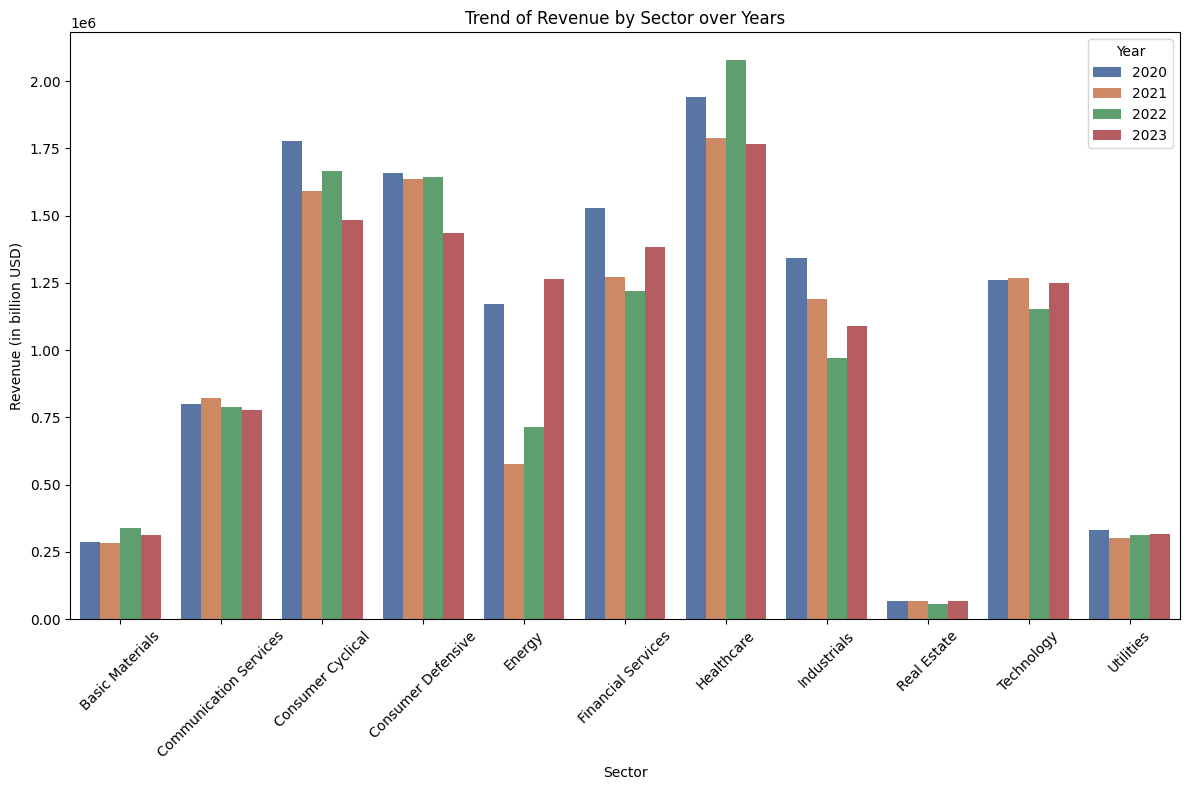

In [ ]:
sector_data_2020 = data_2020_cleaned.groupby('Sector').agg({'Revenue': 'sum'}).reset_index()
sector_data_2021 = data_2021_cleaned.groupby('Sector').agg({'Revenue': 'sum'}).reset_index()
sector_data_2022 = data_2022_cleaned.groupby('Sector').agg({'Revenue': 'sum'}).reset_index()
sector_data_2023 = data_2023_cleaned.groupby('Sector').agg({'Revenue': 'sum'}).reset_index()


def plot_combined_revenue_by_sector_bar(sector_data_dict, palette):
    plt.figure(figsize=(12, 8))

    # Concatenate all years data for plotting
    all_data = pd.DataFrame()
    for year, sector_data in sector_data_dict.items():
        sector_data['Year'] = year  # Add a column for the year
        all_data = pd.concat([all_data, sector_data])

    # Plot the bar chart for revenue
    sns.barplot(x='Sector', y='Revenue', hue='Year', data=all_data, errorbar=None, palette=palette)

    plt.xticks(rotation=45)
    plt.title('Trend of Revenue by Sector over Years')
    plt.ylabel('Revenue (in billion USD)')
    plt.xlabel('Sector')
    plt.legend(title='Year')
    plt.tight_layout()
    plt.show()

# Assuming sector_data_2020, sector_data_2021, sector_data_2022, sector_data_2023 are already defined
sector_data_dict = {
    2020: sector_data_2020,
    2021: sector_data_2021,
    2022: sector_data_2022,
    2023: sector_data_2023
}

# Define the palette before calling the function
palette = 'deep'  # Replace 'deep' with your chosen palette

plot_combined_revenue_by_sector_bar(sector_data_dict, palette)


MACHINE LEARNING TECHNIQUE 1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Read CSV files into DataFrames
folder_path = '/content/drive/MyDrive/CS418_Project/data/Data_wStocks/'
data_2020 = pd.read_csv(folder_path + 'rank_name_symbol_2020.csv')
data_2021 = pd.read_csv(folder_path + 'rank_name_symbol_2021.csv')
data_2022 = pd.read_csv(folder_path + 'rank_name_symbol_2022.csv')
data_2023 = pd.read_csv(folder_path + 'rank_name_symbol_2023.csv')

# Combine the yearly data into a single DataFrame
data = pd.concat([data_2020, data_2021, data_2022, data_2023])

# Cleaning 'Profit' and 'Revenue' columns
def clean_financial_column(df, column_name):
    df[column_name] = df[column_name].replace('[\$,()]', '', regex=True).astype(float)

for column in ['Profit', 'Revenue']:
    clean_financial_column(data, column)

# Encode categorical variables
categorical_columns = ['Name', 'Ticker', 'Sector', 'Industry']  # Adjust as needed
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Defining Revenue Categories based on quantiles
revenue_labels = ['Low', 'Medium', 'High']
data['Revenue Category'] = pd.qcut(data['Revenue'], q=3, labels=revenue_labels)

# Drop rows with NaN values in any column
data_cleaned = data.dropna()

# Preparing features and target variable
features = data_cleaned.drop(['Revenue', 'Revenue Category'], axis=1)  # Drop non-feature columns
target = data_cleaned['Revenue Category']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
numerical_cols = features.select_dtypes(include=['float64']).columns  # Adjust to your numerical columns
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize and train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
# Make predictions



              precision    recall  f1-score   support

        High       0.96      0.95      0.96       108
         Low       0.95      0.98      0.96       125
      Medium       0.93      0.91      0.92       121

    accuracy                           0.95       354
   macro avg       0.95      0.95      0.95       354
weighted avg       0.95      0.95      0.95       354



MACHINE LEARNING TECHNIQUE 2

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Read CSV files into DataFrames
folder_path = '/content/drive/MyDrive/CS418_Project/data/Data_wStocks/'
data_2020 = pd.read_csv(folder_path + 'rank_name_symbol_2020.csv')
data_2021 = pd.read_csv(folder_path + 'rank_name_symbol_2021.csv')
data_2022 = pd.read_csv(folder_path + 'rank_name_symbol_2022.csv')

# Combine data into a single DataFrame, assuming 'data' is already concatenated and cleaned
data = pd.concat([data_2020, data_2021, data_2022])

# Preprocess 'Revenue' column to remove non-numeric characters
data['Revenue'] = data['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Split data into features and target
X = data.drop(['Revenue'], axis=1)  # Exclude target column
y = data['Revenue']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for both numerical and categorical data.
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Using median to impute any missing values
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values for categories
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encode categorical variables

# Bundle preprocessing for numerical and categorical data.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a random forest regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Define the parameter space for RandomizedSearch
param_distributions = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV with error_score='raise' to debug
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42,
    error_score='raise'  # This will raise the actual exception
)

try:
    random_search.fit(X_train, y_train)
except ValueError as e:
    print(e)  # Printing the exception to get more details about the failure

# Get the best model after random search
best_model = random_search.best_estimator_

# Predict revenue figures for the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model using the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the performance and best parameters
print(f'Best Model Parameters: {random_search.best_params_}')
print(f'R2 score: {r2}')
print(f'Mean Squared Error: {mse}')


Best Model Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': None}
R2 score: 0.964991486979684
Mean Squared Error: 91708135.46251349


MACHINE LEARNING TECHNIQUE 3


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' DataFrame is already preprocessed and ready for modeling.
# Read CSV files into DataFrames
folder_path = '/content/drive/MyDrive/CS418_Project/data/Data_wStocks/'
data_2020 = pd.read_csv(folder_path + 'rank_name_symbol_2020.csv')
data_2021 = pd.read_csv(folder_path + 'rank_name_symbol_2021.csv')
data_2022 = pd.read_csv(folder_path + 'rank_name_symbol_2022.csv')

# Combine data into a single DataFrame, assuming 'data' is already concatenated and cleaned
data = pd.concat([data_2020, data_2021, data_2022])

# Handling non-numeric values in the 'Profit' column
data['Profit'] = data['Profit'].str.replace('[\$,()]', '', regex=True).astype(float)

# Split data into features and target
X = data.drop(['Profit'], axis=1)  # Exclude target column 'Profit'
y = data['Profit']  # Set 'Profit' as the target variable

# Handling NaN values in the target variable 'y' (if any)
imputer_y = SimpleImputer(strategy='median')
y = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for both numerical and categorical data.
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Using median to impute any missing values
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values for categories
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encode categorical variables

# Bundle preprocessing for numerical and categorical data.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a random forest regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

# Define the parameter space for RandomizedSearch
param_distributions = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Initialize RandomizedSearchCV with error_score='raise' to debug
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    scoring='neg_mean_squared_error',
    random_state=42,
    error_score='raise'  # This will raise the actual exception
)

try:
    random_search.fit(X_train, y_train)
except ValueError as e:
    print(e)  # Printing the exception to get more details about the failure

# Get the best model after random search
best_model = random_search.best_estimator_

# Predict profit figures for the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model using the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the performance and best parameters
print(f'Best Model Parameters: {random_search.best_params_}')
print(f'R2 score: {r2}')
print(f'Mean Squared Error: {mse}')


Best Model Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': None}
R2 score: 0.6967302502220143
Mean Squared Error: 7005753.5454592295
